In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Data Preparation:

In [4]:
X = df.drop('class', axis = 1)

In [5]:
X = pd.get_dummies(X, drop_first = True)

In [6]:
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

Creating A Gradient Boosted Trees Model With Grid Search:

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.05, 0.2], 'max_depth': [3, 4, 5]}
#The learning rate parameter controls the step size taken during each iteration

In [12]:
gb_model = GradientBoostingClassifier()

In [13]:
grid = GridSearchCV(gb_model, param_grid)

In [14]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

Model Evaluation:

In [15]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [16]:
predictions = grid.predict(X_test)

In [17]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], shape=(1219,), dtype=object)

In [18]:
grid.best_estimator_

GradientBoostingClassifier()

In [ ]:
grid.best_params_
#These actually happen to be the default values

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [21]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 2.17483728e-17, 0.00000000e+00, 0.00000000e+00,
       6.62283304e-17, 1.05030313e-03, 5.96907397e-18, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.20777385e-17, 0.00000000e+00,
       6.40960286e-17, 0.00000000e+00, 0.00000000e+00, 3.34879058e-08,
       2.31053911e-03, 5.17748637e-02, 6.24175887e-04, 1.74174284e-02,
       1.82499853e-02, 2.25221200e-03, 6.14744334e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 5.98368955e-18, 1.27312190e-02,
       1.04355233e-02, 0.00000000e+00, 6.06649474e-17, 0.00000000e+00,
       2.31248319e-17, 0.00000000e+00, 0.00000000e+00, 7.30124021e-18,
       4.78473054e-18, 0.00000000e+00, 4.58627677e-17, 0.00000000e+00,
       1.18312069e-05, 4.13835786e-04, 1.36050907e-01, 7.71855052e-03,
       4.24923272e-02, 7.95843895e-04, 6.12113083e-06, 6.53890008e-05,
       3.60117275e-05, 3.35261145e-03, 2.47686007e-02, 1.04491757e-04,
       0.00000000e+00, 0.00000000e+00, 8.27598823e-06, 0.00000000e+00,
      

In [22]:
feat_import = grid.best_estimator_.feature_importances_

In [24]:
imp_feat = pd.DataFrame(index = X.columns, data = feat_import, columns = ['Importance'])

In [25]:
imp_feat

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,2.174837e-17
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,6.622833e-17
...,...
habitat_l,0.000000e+00
habitat_m,8.905963e-17
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [26]:
imp_feat = imp_feat[imp_feat['Importance'] > 0.0005]

In [27]:
imp_feat

,Importance
cap-surface_g,0.001050
cap-color_y,0.002311
bruises_t,0.051775
odor_c,0.000624
odor_f,0.017417
odor_l,0.018250
odor_m,0.002252
odor_n,0.614744
odor_p,0.000921
gill-spacing_w,0.012731


<Axes: xlabel='None', ylabel='Importance'>

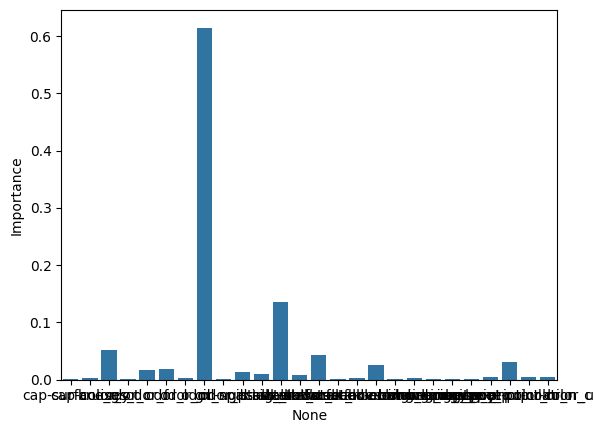

In [28]:
sns.barplot(data = imp_feat, x = imp_feat.index, y = 'Importance')

In [29]:
imp_feat = imp_feat.sort_values('Importance')

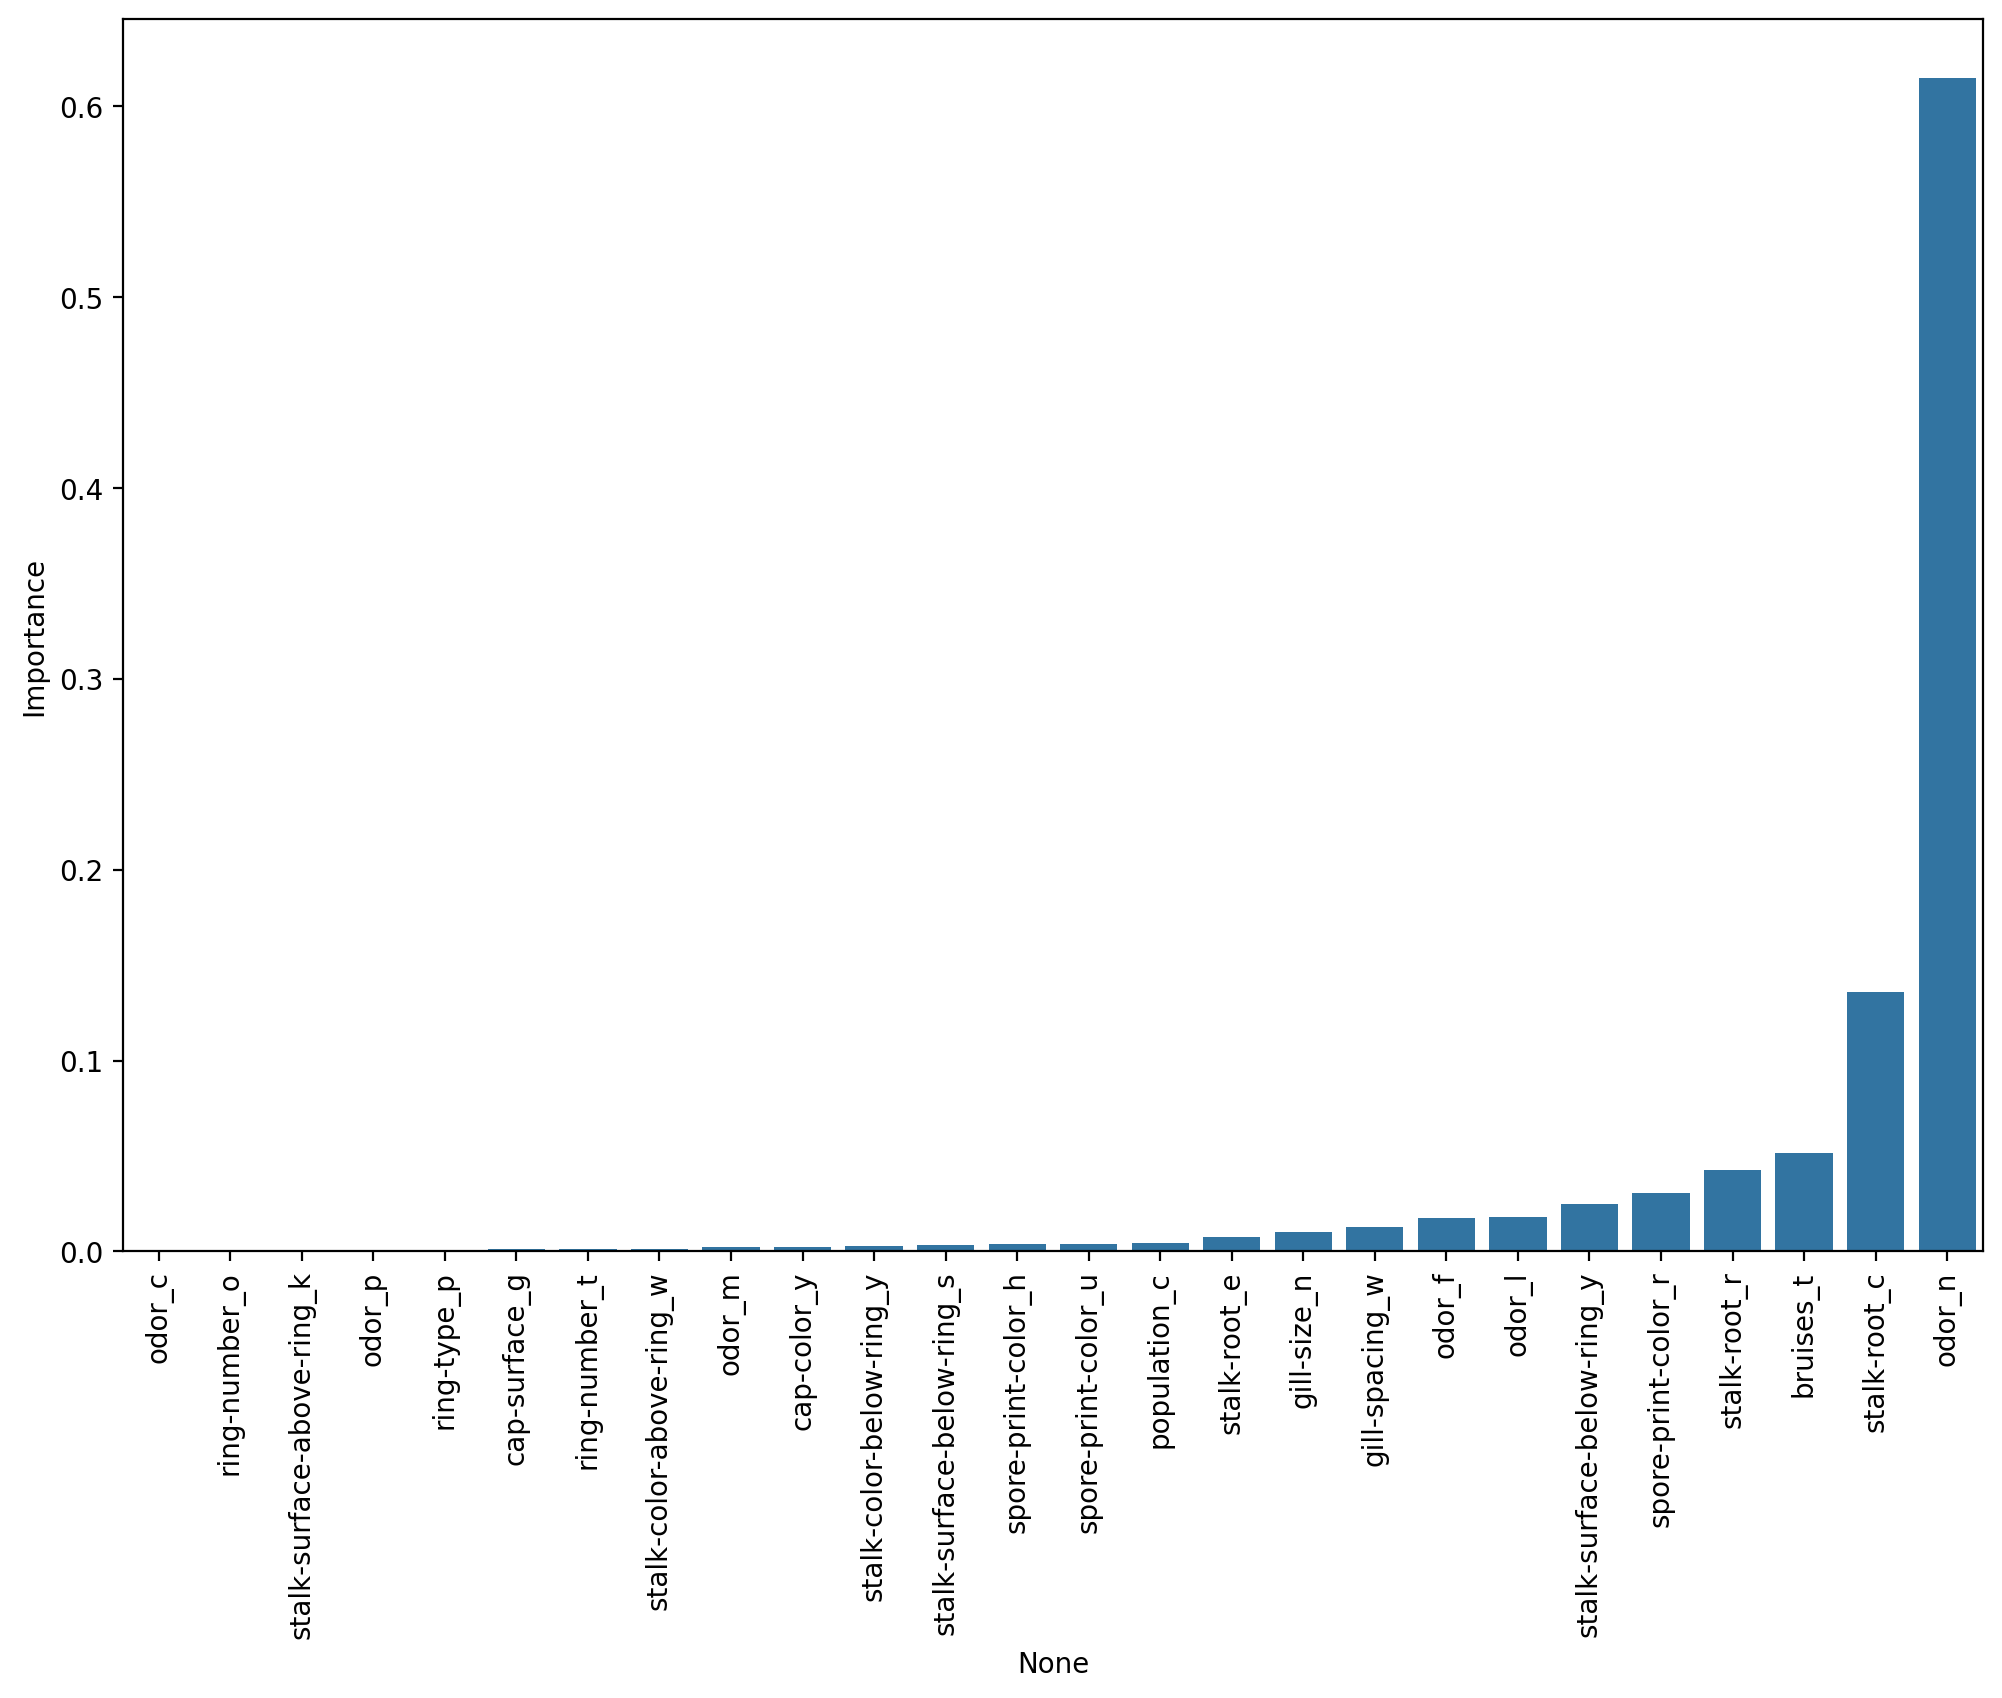

In [30]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.barplot(data = imp_feat, x = imp_feat.index, y = 'Importance')
plt.xticks(rotation = 90);